<a href="https://colab.research.google.com/github/ReinaldoAraqueV/Modelos_y_Metodos_de_Sistemas_Inteligentes/blob/main/Sesion1_Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Basados en Reglas para Clasificación


## Análisis de Accidentes de Tránsito en Bucaramanga

**Estudiantes:** Diego Paipa - Reinaldo Araque Villamizar  
**Programa:** Maestría en Análisis de Datos y Sistemas Inteligentes  
**Curso:** Modelos y Métodos de Sistemas Inteligentes  

# Metodologia

### **Exploración y preprocesamiento del conjunto de datos**
### **Implementación de tres tipos de sistemas basados en reglas:**



*  Árboles de decisión (que generan reglas jerárquicas)
*  Algoritmo OneR (sistema simple de una sola regla)
*  Sistema de lógica difusa (fuzzy logic) para evaluación de riesgo



### Visualización de las reglas y resultados
### Comparación entre los diferentes modelos

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image
import io

In [ ]:
# Configuración para visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
RANDOM_SEED = 42

## 1.Carga y Exploración de Datos

In [ ]:
# Cargar el dataset
url = "https://raw.githubusercontent.com/ReinaldoAraqueV/Clase_Ciencia_Datos/main/Accidentes_de_Transito_ocurridos_en_el_Municipio_de_Bucaramanga.csv"
df = pd.read_csv(url)

##### Dimensiones del Dataset

In [ ]:
print(df.shape)

(39193, 24)


#### Mostrar las primeras filas

In [ ]:
df.head()

,ORDEN,FECHA,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,...,VOLQUETA,MOTO,BICICLETA,OTRO,BARRIO,HORA,ENTIDAD,COMUNA,Propietario de Vehículo,DIURNIO/NOCTURNO
0,1,01/01/2012,2012,01. Enero,07. Domingo,Con heridos,0,1,0,0,...,0,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,...,0,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,3,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,0,0,1,...,0,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,4,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,...,0,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,5,01/01/2012,2012,01. Enero,07. Domingo,Con heridos,1,0,0,0,...,0,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno


### 1.1 Exploración Inicial

#### Información general del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ORDEN                    39193 non-null  int64 
 1   FECHA                    39193 non-null  object
 2   AÑO                      39193 non-null  int64 
 3   MES                      39193 non-null  object
 4   DÍA                      39193 non-null  object
 5   GRAVEDAD                 39193 non-null  object
 6   PEATON                   39193 non-null  int64 
 7   AUTOMOVIL                39193 non-null  int64 
 8   CAMPERO                  39193 non-null  int64 
 9   CAMIONETA                39193 non-null  int64 
 10  MICRO                    39193 non-null  int64 
 11  BUSETA                   39193 non-null  int64 
 12  BUS                      39193 non-null  int64 
 13  CAMION                   39193 non-null  int64 
 14  VOLQUETA                 39193 non-nul

#### Estadísticas descriptivas

In [ ]:
df.describe()

,ORDEN,AÑO,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO
count,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000
mean,19597.000000,2016.624550,0.105529,0.781262,0.060368,0.197076,0.020284,0.043732,0.048070,0.083331,0.014033,0.626617,0.017682,0.021279
std,11314.188887,3.160996,0.340785,0.742035,0.244827,0.431634,0.142054,0.210890,0.217934,0.287960,0.119138,0.654329,0.133333,0.149867
min,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9799.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19597.000000,2016.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,29395.000000,2019.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,39193.000000,2023.000000,7.000000,29.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,2.000000


#### Verificar valores faltantes

In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
missing_data

,Missing Values,Percentage


###1.2 Análisis Exploratorio

#### Analizar distribución de la variable objetivo (GRAVEDAD)

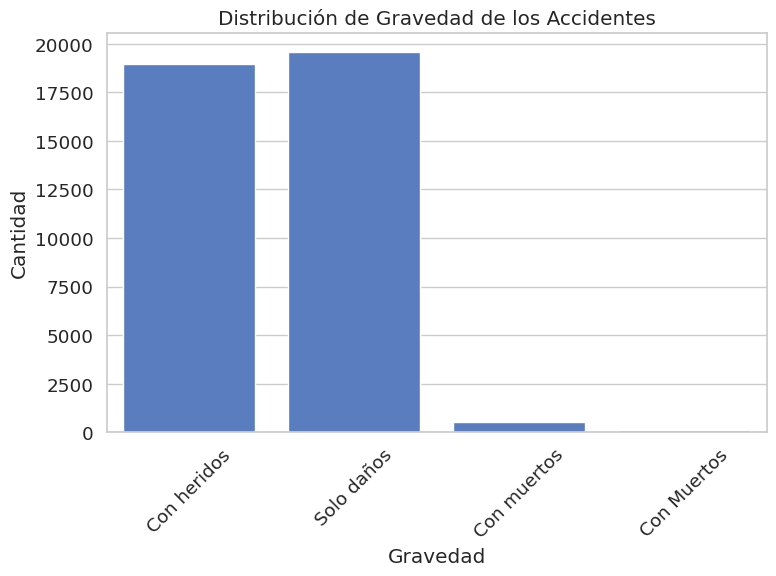

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GRAVEDAD')
plt.title('Distribución de Gravedad de los Accidentes')
plt.xlabel('Gravedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.Preprocesamiento de Datos

### 2.1 Transformación de variables categóricas
(Transformación de la variable GRAVEDAD)

In [ ]:
print("Distribución original de GRAVEDAD:")
print(df['GRAVEDAD'].value_counts())
print(f"Porcentaje de 'Con muertos': {df[df['GRAVEDAD'] == 'Con muertos'].shape[0] / df.shape[0] * 100:.2f}%")

Distribución original de GRAVEDAD:
GRAVEDAD
Solo daños     19602
Con heridos    18982
Con muertos      503
Con Muertos      106
Name: count, dtype: int64
Porcentaje de 'Con muertos': 1.28%


#### Crear la función para procesar GRAVEDAD

In [ ]:
def process_gravity_column(gravity):
    """
    Binariza la variable GRAVEDAD:
    1 = Con heridos/Con muertos
    0 = Solo daños
    """
    if pd.isna(gravity):
        return None

    if isinstance(gravity, str):
        if gravity.upper() in ['CON HERIDOS', 'CON MUERTOS']:
            return 1  # Clase positiva (Con heridos/muertos)
        elif gravity.upper() == 'SOLO DAÑOS':
            return 0  # Clase negativa (Solo daños)
    return None


#### Procesar HORA

In [ ]:
def process_hour_column(hour):
    """
    Convierte la hora a formato numérico (0-23)
    """
    if pd.isna(hour):
        return None

    if isinstance(hour, str):
        try:
            # Si tiene formato HH:MM:SS
            if ':' in hour:
                return int(hour.split(':')[0])
            # Si es un número directo
            else:
                return int(float(hour))
        except:
            return None
    return hour

#### Procesar MES

In [ ]:
def process_month_column(month):
    """
    Extrae el número de mes a partir del formato NN.NOMBRE_MES
    """
    if pd.isna(month):
        return None

    if isinstance(month, str):
        months = {
            'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
            'JULIO': 7, 'AGOSTO': 8, 'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12
        }
        # Si el formato es "01. Enero"
        if '.' in month:
            month_name = month.split('.')[1].strip().upper()
            return months.get(month_name, None)
        # Si solo es el nombre del mes
        else:
            return months.get(month.strip().upper(), None)
    return None

#### Procesar DÍA

In [ ]:
def process_day_column(day):
    """
    Convierte el día de la semana a un número (1-7)
    """
    if pd.isna(day):
        return None

    if isinstance(day, str):
        days = {
            'LUNES': 1, 'MARTES': 2, 'MIÉRCOLES': 3, 'MIERCOLES': 3, 'JUEVES': 4,
            'VIERNES': 5, 'SÁBADO': 6, 'SABADO': 6, 'DOMINGO': 7
        }
        # Si el formato es "07. Domingo"
        if '.' in day:
            day_name = day.split('.')[1].strip().upper()
            return days.get(day_name, None)
        # Si solo es el nombre del día
        else:
            return days.get(day.strip().upper(), None)
    return None

#### Procesar DIURNO /NOCTURNO

In [ ]:
def process_day_night_column(time):
    """
    Codifica DIURNO=1, NOCTURNO=0
    """
    if pd.isna(time):
        return None

    if isinstance(time, str):
        if time.upper() == 'DIURNO':
            return 1
        elif time.upper() == 'NOCTURNO':
            return 0
    return None


In [ ]:
# Crear dataframe para preprocesamiento
df_modelo = df.copy()

In [ ]:
# Aplicar transformaciones
print("\nAplicando transformaciones...")


Aplicando transformaciones...


In [ ]:
# GRAVEDAD
df_modelo['GRAVEDAD_BIN'] = df_modelo['GRAVEDAD'].apply(process_gravity_column)
print("✓ GRAVEDAD transformada")

# HORA
df_modelo['HORA_NUM'] = df_modelo['HORA'].apply(process_hour_column)
print("✓ HORA transformada")

# MES
df_modelo['MES_NUM'] = df_modelo['MES'].apply(process_month_column)
print("✓ MES transformado")

# DÍA
df_modelo['DIA_NUM'] = df_modelo['DÍA'].apply(process_day_column)
print("✓ DÍA transformado")

# DIURNIO/NOCTURNO (corrigiendo posible error tipográfico)
day_night_cols = [col for col in df_modelo.columns if 'DIURN' in col]
if day_night_cols:
    day_night_col = day_night_cols[0]
    df_modelo['PERIODO_DIA'] = df_modelo[day_night_col].apply(process_day_night_column)
    print(f"✓ {day_night_col} transformada")

✓ GRAVEDAD transformada
✓ HORA transformada
✓ MES transformado
✓ DÍA transformado
✓ DIURNIO/NOCTURNO transformada


In [ ]:
# Seleccionar columnas relevantes para el modelo
# Variables categóricas transformadas y vehículos involucrados
columnas_seleccionadas = [
    'GRAVEDAD_BIN', 'PEATON', 'AUTOMOVIL', 'CAMPERO', 'CAMIONETA',
    'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO',
    'BICICLETA', 'OTRO', 'HORA_NUM', 'MES_NUM', 'DIA_NUM', 'PERIODO_DIA'
]

# Filtrar columnas disponibles
columnas_disponibles = [col for col in columnas_seleccionadas if col in df_modelo.columns]
print(f"\nColumnas seleccionadas para el modelo ({len(columnas_disponibles)}):")
print(", ".join(columnas_disponibles))

# Crear dataframe final para modelado
df_final = df_modelo[columnas_disponibles].copy()

# Verificar valores faltantes
print("\nValores faltantes después del preprocesamiento:")
missing = df_final.isnull().sum()
print(missing[missing > 0])

# Imputar valores faltantes
for columna in df_final.columns:
    if df_final[columna].isnull().sum() > 0:
        if df_final[columna].dtype == 'object':
            # Para variables categóricas, usar la moda
            df_final[columna] = df_final[columna].fillna(df_final[columna].mode()[0])
        else:
            # Para variables numéricas, usar la mediana
            df_final[columna] = df_final[columna].fillna(df_final[columna].median())

print("✓ Valores faltantes imputados")
print("\nPrimeras filas del dataset procesado:")
df_final.head()



Columnas seleccionadas para el modelo (17):
GRAVEDAD_BIN, PEATON, AUTOMOVIL, CAMPERO, CAMIONETA, MICRO, BUSETA, BUS, CAMION, VOLQUETA, MOTO, BICICLETA, OTRO, HORA_NUM, MES_NUM, DIA_NUM, PERIODO_DIA

Valores faltantes después del preprocesamiento:
Series([], dtype: int64)
✓ Valores faltantes imputados

Primeras filas del dataset procesado:


,GRAVEDAD_BIN,PEATON,AUTOMOVIL,CAMPERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,HORA_NUM,MES_NUM,DIA_NUM,PERIODO_DIA
0,1,0,1,0,0,0,0,0,0,0,0,0,0,12,1,7,1
1,0,0,1,0,1,0,0,0,0,0,0,0,0,14,1,7,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,12,1,7,1
3,0,0,1,0,1,0,0,0,0,0,0,0,0,18,1,7,0
4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,7,0


###2.2 División del conjunto de datos

### Definir variables predictoras y variable objetivo


In [ ]:
X = df_final.drop('GRAVEDAD_BIN', axis=1)
y = df_final['GRAVEDAD_BIN']

#### Dividir en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)

print(f"\nConjunto de entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} registros ({X_test.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Distribución de clases en entrenamiento: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Distribución de clases en prueba: {y_test.value_counts(normalize=True).to_dict()}")


Conjunto de entrenamiento: 27435 registros (70.0%)
Conjunto de prueba: 11758 registros (30.0%)
Distribución de clases en entrenamiento: {0: 0.5001275742664479, 1: 0.499872425733552}
Distribución de clases en prueba: {0: 0.5001700969552645, 1: 0.4998299030447355}


## 3.Implementación de Modelos Basados en Reglas

### 3.1 Árbol de Decisión como Sistema Basado en Reglas

In [ ]:
print("3.1 Árbol de Decisión como Sistema Basado en Reglas")
print("-------------------------------------------------")

3.1 Árbol de Decisión como Sistema Basado en Reglas
-------------------------------------------------


#### Crear y entrenar el árbol de decisión

In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,  # Profundidad máxima para evitar sobreajuste
    criterion='gini',
    min_samples_split=30,
    min_samples_leaf=15,
    random_state=RANDOM_SEED
)


In [ ]:
# Entrenar el modelo
dt_classifier.fit(X_train, y_train)

# Evaluar el modelo
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Precisión del árbol de decisión: {accuracy_dt:.4f}")

Precisión del árbol de decisión: 0.8435


In [ ]:
# Reporte de clasificación
print("\nReporte de clasificación para el árbol de decisión:")
print(classification_report(y_test, y_pred_dt))


Reporte de clasificación para el árbol de decisión:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      5881
           1       0.80      0.92      0.85      5877

    accuracy                           0.84     11758
   macro avg       0.85      0.84      0.84     11758
weighted avg       0.85      0.84      0.84     11758



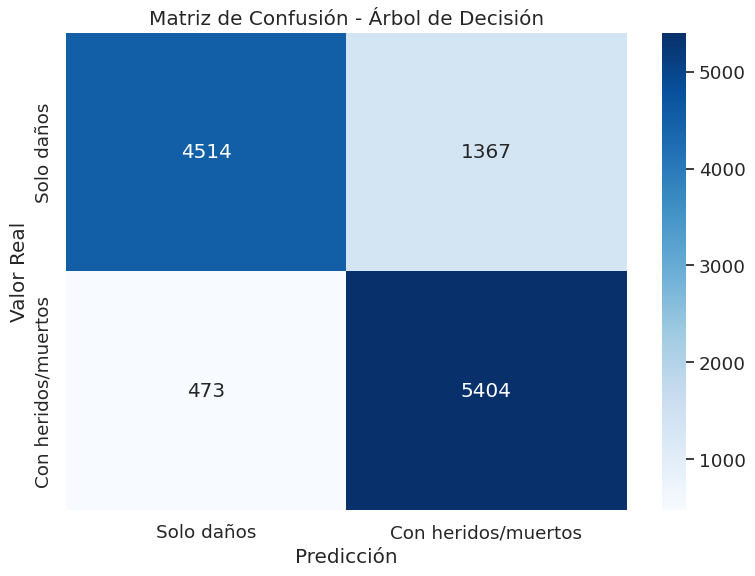

In [ ]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Solo daños', 'Con heridos/muertos'],
            yticklabels=['Solo daños', 'Con heridos/muertos'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

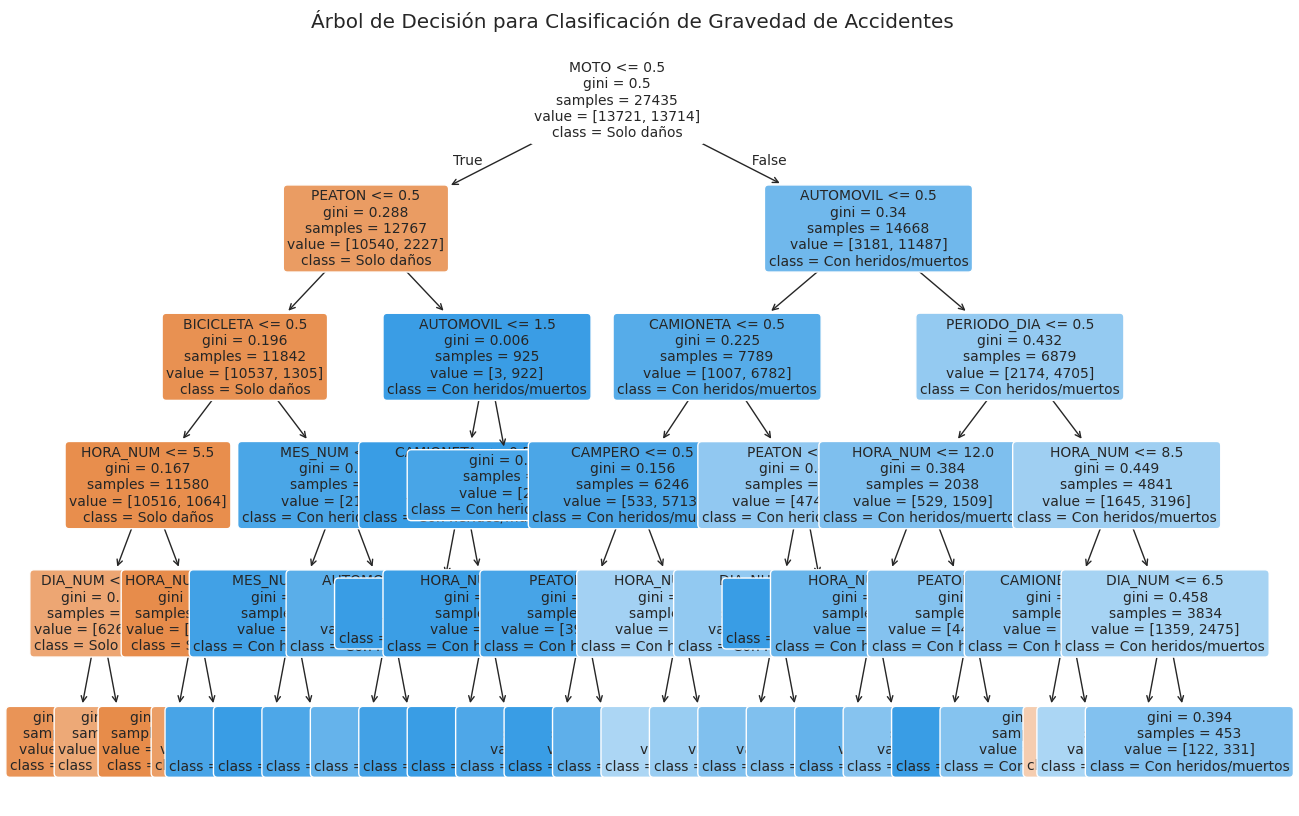

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
feature_names = X.columns
class_names = ['Solo daños', 'Con heridos/muertos']

# Exportar y visualizar el árbol
tree.plot_tree(dt_classifier,
               feature_names=feature_names,
               class_names=class_names,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árbol de Decisión para Clasificación de Gravedad de Accidentes')
plt.show()

### 3.2 Extracción de Reglas del Árbol de Decisión

In [ ]:
print("\n3.2 Extracción de Reglas del Árbol de Decisión")
print("------------------------------------------")


3.2 Extracción de Reglas del Árbol de Decisión
------------------------------------------


In [ ]:
# Función para extraer reglas del árbol
def get_rules(tree_classifier, feature_names, class_names):
    # Access the internal tree structure
    tree_ = tree_classifier.tree_

    # Access TREE_UNDEFINED from the sklearn.tree module
    # Corrected: Check if feature index is non-negative instead of using TREE_UNDEFINED
    feature_name = [
        feature_names[i] if i >= 0 else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):
        # Corrected: Check if feature index is non-negative instead of using TREE_UNDEFINED
        if tree_.feature[node] >= 0:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            # Agregar nodo izquierdo (<=)
            path.append((name, "<=", threshold))
            recurse(tree_.children_left[node], path, paths)

            # Eliminar último elemento para la rama derecha
            path.pop()

            # Agregar nodo derecho (>)
            path.append((name, ">", threshold))
            recurse(tree_.children_right[node], path, paths)

            # Eliminar último elemento antes de volver
            path.pop()
        else:
            # This is a leaf node
            class_distribution = tree_.value[node][0]
            class_index = np.argmax(class_distribution)
            class_name = class_names[class_index]

            # Calcular confianza como la proporción de la clase mayoritaria
            total_samples = np.sum(class_distribution)
            confidence = (class_distribution[class_index] / total_samples) if total_samples > 0 else 0

            if confidence > 0.7:  # Solo mostrar reglas con alta confianza
                paths.append((path.copy(), class_name, confidence, total_samples))

    # Start recursion from the root node (node 0)
    recurse(0, path, paths)

    # Formatear las reglas para mejor legibilidad
    rules = []
    for path, class_name, confidence, samples in paths:
        rule = "SI "
        for i, (feature, operation, threshold) in enumerate(path):
            if i > 0:
                rule += " Y "

            if isinstance(threshold, int) or threshold.is_integer():
                rule += f"{feature} {operation} {int(threshold)}"
            else:
                rule += f"{feature} {operation} {threshold:.2f}"

        rule += f" ENTONCES Gravedad = {class_name} (confianza: {confidence:.2f}, muestras: {int(samples)})"
        rules.append((rule, confidence, samples))

    # Ordenar reglas por confianza y número de muestras
    return sorted(rules, key=lambda x: (-x[1], -x[2]))

# Obtener y mostrar las reglas del árbol de decisión
# Pass the trained classifier object and the feature names and class names
rules = get_rules(dt_classifier, X.columns, ['Solo daños', 'Con heridos/muertos'])
print("\nReglas extraídas del árbol de decisión:")
for i, (rule, confidence, samples) in enumerate(rules, 1):
    print(f"Regla {i}: {rule}")


Reglas extraídas del árbol de decisión:
Regla 1: SI MOTO <= 0.50 Y PEATON <= 0.50 Y BICICLETA > 0.50 Y MES_NUM <= 7.50 Y MES_NUM > 4.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 2: SI MOTO <= 0.50 Y PEATON > 0.50 Y AUTOMOVIL <= 1.50 Y CAMIONETA <= 0.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 3: SI MOTO <= 0.50 Y PEATON > 0.50 Y AUTOMOVIL <= 1.50 Y CAMIONETA > 0.50 Y HORA_NUM > 8.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 4: SI MOTO > 0.50 Y AUTOMOVIL <= 0.50 Y CAMIONETA <= 0.50 Y CAMPERO <= 0.50 Y PEATON > 0.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 5: SI MOTO > 0.50 Y AUTOMOVIL <= 0.50 Y CAMIONETA > 0.50 Y PEATON > 0.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 6: SI MOTO > 0.50 Y AUTOMOVIL > 0.50 Y PERIODO_DIA <= 0.50 Y HORA_NUM > 12 Y PEATON > 0.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.0

### 3.3 Implementación del Algoritmo OneR

In [ ]:
print("\n3.3 Implementación del Algoritmo OneR")
print("----------------------------------")


3.3 Implementación del Algoritmo OneR
----------------------------------


In [ ]:
class OneRClassifier:
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.classes = None
        self.feature_name = None
        self.accuracy = None

    def fit(self, X, y):
        # Convertir a numpy array
        X = np.array(X)
        y = np.array(y)

        self.classes = np.unique(y)
        n_features = X.shape[1]
        feature_names = list(X.columns) if hasattr(X, 'columns') else [f"feature_{i}" for i in range(n_features)]

        best_feature_idx = None
        best_accuracy = -1
        best_threshold = None

        # Probar cada característica
        for feature_idx in range(n_features):
            # Ordenar valores únicos
            unique_values = np.sort(np.unique(X[:, feature_idx]))

            if len(unique_values) <= 1:
                continue

            # Calcular umbrales como punto medio entre valores consecutivos
            thresholds = [(unique_values[i] + unique_values[i+1])/2 for i in range(len(unique_values)-1)]

            for threshold in thresholds:
                # Predecir basado en el umbral
                y_pred = np.where(X[:, feature_idx] <= threshold, self.classes[0], self.classes[-1])

                # Calcular precisión
                accuracy = np.mean(y_pred == y)

                # Actualizar si es mejor
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_feature_idx = feature_idx
                    best_threshold = threshold

        self.feature_idx = best_feature_idx
        self.threshold = best_threshold
        self.feature_name = feature_names[best_feature_idx]
        self.accuracy = best_accuracy

        return self

    def predict(self, X):
        X = np.array(X)
        return np.where(X[:, self.feature_idx] <= self.threshold, self.classes[0], self.classes[-1])

    def get_rule(self):
        class_0 = "Solo daños" if self.classes[0] == 0 else "Con heridos/muertos"
        class_1 = "Solo daños" if self.classes[-1] == 0 else "Con heridos/muertos"

        return f"SI {self.feature_name} <= {self.threshold:.2f} ENTONCES Gravedad = {class_0}, SINO Gravedad = {class_1} (precisión: {self.accuracy:.2f})"


#### Entrenar y evaluar el modelo OneR

Precisión del modelo OneR: 0.8010

Regla OneR generada:
SI feature_9 <= 0.50 ENTONCES Gravedad = Solo daños, SINO Gravedad = Con heridos/muertos (precisión: 0.80)

Reporte de clasificación para OneR:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      5881
           1       0.78      0.83      0.81      5877

    accuracy                           0.80     11758
   macro avg       0.80      0.80      0.80     11758
weighted avg       0.80      0.80      0.80     11758



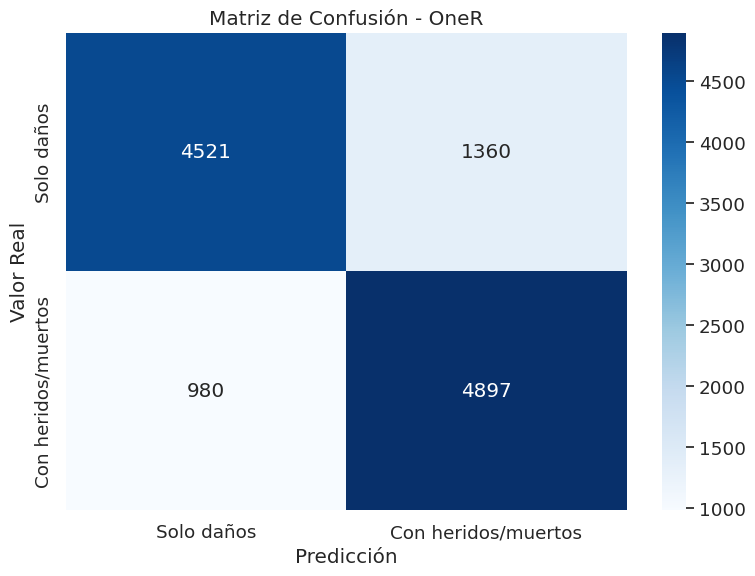

In [ ]:
oner_classifier = OneRClassifier()
oner_classifier.fit(X_train, y_train)

# Predecir y evaluar
y_pred_oner = oner_classifier.predict(X_test)
accuracy_oner = accuracy_score(y_test, y_pred_oner)
print(f"Precisión del modelo OneR: {accuracy_oner:.4f}")

# Mostrar la regla generada
print("\nRegla OneR generada:")
print(oner_classifier.get_rule())

# Reporte de clasificación para OneR
print("\nReporte de clasificación para OneR:")
print(classification_report(y_test, y_pred_oner))

# Matriz de confusión para OneR
plt.figure(figsize=(8, 6))
cm_oner = confusion_matrix(y_test, y_pred_oner)
sns.heatmap(cm_oner, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Solo daños', 'Con heridos/muertos'],
            yticklabels=['Solo daños', 'Con heridos/muertos'])
plt.title('Matriz de Confusión - OneR')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

### 3.4 Sistema Difuso (Fuzzy Logic) para Evaluación de Riesgo

In [ ]:
print("\n3.4 Sistema Difuso (Fuzzy Logic) para Evaluación de Riesgo")
print("----------------------------------------------------")


3.4 Sistema Difuso (Fuzzy Logic) para Evaluación de Riesgo
----------------------------------------------------


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.6 MB/s eta 0:00:00


In [ ]:
# Importar bibliotecas para lógica difusa
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Definir variables de entrada y salida
hora = ctrl.Antecedent(np.arange(0, 24, 1), 'hora')
moto = ctrl.Antecedent(np.arange(0, 2, 1), 'moto')  # 0=No hay moto, 1=Hay moto
periodo = ctrl.Antecedent(np.arange(0, 2, 1), 'periodo_dia')  # 0=Nocturno, 1=Diurno

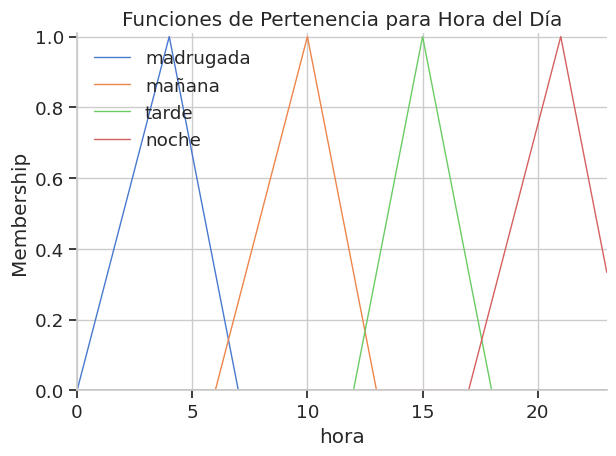

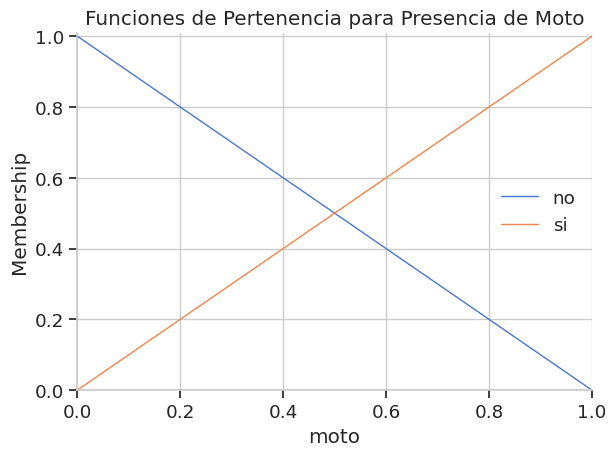

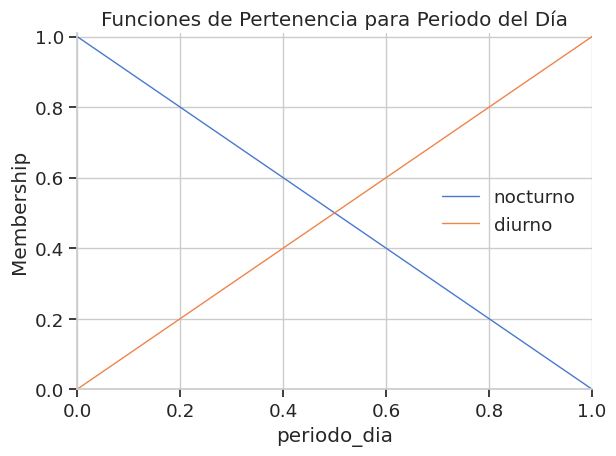

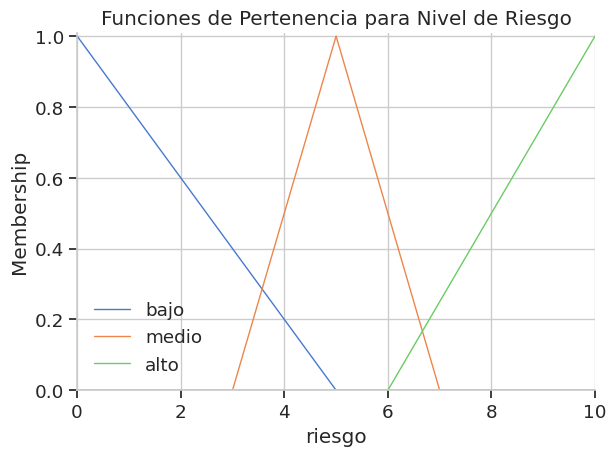

In [ ]:
# Variable de salida - nivel de riesgo
riesgo = ctrl.Consequent(np.arange(0, 11, 1), 'riesgo')

# Definir funciones de pertenencia
# Hora del día
hora['madrugada'] = fuzz.trimf(hora.universe, [0, 4, 7])
hora['mañana'] = fuzz.trimf(hora.universe, [6, 10, 13])
hora['tarde'] = fuzz.trimf(hora.universe, [12, 15, 18])
hora['noche'] = fuzz.trimf(hora.universe, [17, 21, 24])

# Presencia de moto
moto['no'] = fuzz.trimf(moto.universe, [0, 0, 0.5])
moto['si'] = fuzz.trimf(moto.universe, [0.5, 1, 1])

# Periodo del día
periodo['nocturno'] = fuzz.trimf(periodo.universe, [0, 0, 0.5])
periodo['diurno'] = fuzz.trimf(periodo.universe, [0.5, 1, 1])

# Nivel de riesgo
riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 0, 5])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [3, 5, 7])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [6, 10, 10])

# Visualizar funciones de pertenencia
hora.view()
plt.title('Funciones de Pertenencia para Hora del Día')
plt.tight_layout()
plt.show()

moto.view()
plt.title('Funciones de Pertenencia para Presencia de Moto')
plt.tight_layout()
plt.show()

periodo.view()
plt.title('Funciones de Pertenencia para Periodo del Día')
plt.tight_layout()
plt.show()

riesgo.view()
plt.title('Funciones de Pertenencia para Nivel de Riesgo')
plt.tight_layout()
plt.show()

#### Definir reglas difusas


Evaluación de riesgo usando sistema difuso:
Hora: 22h, Con moto, Periodo: Nocturno → Nivel de Riesgo: 8.67 (Alto)
Hora: 3h, Con moto, Periodo: Nocturno → Nivel de Riesgo: 8.67 (Alto)
Hora: 10h, Sin moto, Periodo: Diurno → Nivel de Riesgo: 1.67 (Bajo)
Hora: 16h, Con moto, Periodo: Diurno → Nivel de Riesgo: 5.00 (Medio)
Error en el cálculo difuso: 'riesgo'
Hora: 20h, Sin moto, Periodo: Nocturno → Nivel de Riesgo: 5.00 (Medio)
Hora: 14h, Sin moto, Periodo: Diurno → Nivel de Riesgo: 1.67 (Bajo)
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo difuso: 'riesgo'
Error en el cálculo di

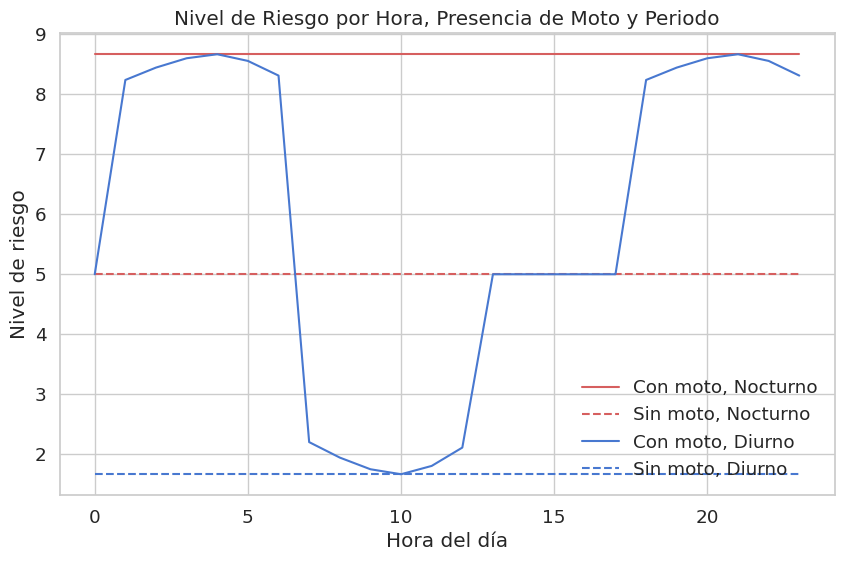


Resumen de las reglas difusas:
------------------------------
Regla 1: SI hay moto Y es periodo nocturno, ENTONCES riesgo es alto
Regla 2: SI hay moto Y es de noche, ENTONCES riesgo es alto
Regla 3: SI hay moto Y es de madrugada, ENTONCES riesgo es alto
Regla 4: SI no hay moto Y es periodo diurno, ENTONCES riesgo es bajo
Regla 5: SI es periodo diurno Y es de mañana, ENTONCES riesgo es bajo
Regla 6: SI hay moto Y es periodo diurno Y es de tarde, ENTONCES riesgo es medio


In [ ]:
# Importar bibliotecas para lógica difusa
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definir variables de entrada y salida
hora = ctrl.Antecedent(np.arange(0, 24, 1), 'hora')
moto = ctrl.Antecedent(np.arange(0, 2, 1), 'moto')  # 0=No hay moto, 1=Hay moto
periodo = ctrl.Antecedent(np.arange(0, 2, 1), 'periodo_dia')  # 0=Nocturno, 1=Diurno

# Variable de salida - nivel de riesgo
riesgo = ctrl.Consequent(np.arange(0, 11, 1), 'riesgo')

# Definir funciones de pertenencia
# Hora del día
hora['madrugada'] = fuzz.trimf(hora.universe, [0, 4, 7])
hora['mañana'] = fuzz.trimf(hora.universe, [6, 10, 13])
hora['tarde'] = fuzz.trimf(hora.universe, [12, 15, 18])
hora['noche'] = fuzz.trimf(hora.universe, [17, 21, 24])

# Presencia de moto
moto['no'] = fuzz.trimf(moto.universe, [0, 0, 0.5])
moto['si'] = fuzz.trimf(moto.universe, [0.5, 1, 1])

# Periodo del día
periodo['nocturno'] = fuzz.trimf(periodo.universe, [0, 0, 0.5])
periodo['diurno'] = fuzz.trimf(periodo.universe, [0.5, 1, 1])

# Nivel de riesgo
riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 0, 5])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [3, 5, 7])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [6, 10, 10])

# Visualizar funciones de pertenencia
hora.view()
plt.title('Funciones de Pertenencia para Hora del Día')
plt.tight_layout()
plt.savefig('hora_memb.png')  # Guardar gráfico para incluir en documentación
plt.close()

moto.view()
plt.title('Funciones de Pertenencia para Presencia de Moto')
plt.tight_layout()
plt.savefig('moto_memb.png')
plt.close()

periodo.view()
plt.title('Funciones de Pertenencia para Periodo del Día')
plt.tight_layout()
plt.savefig('periodo_memb.png')
plt.close()

riesgo.view()
plt.title('Funciones de Pertenencia para Nivel de Riesgo')
plt.tight_layout()
plt.savefig('riesgo_memb.png')
plt.close()

# Definir reglas difusas
# IMPORTANTE: Asegurarse de que todas las reglas sean válidas y usen todas las variables correctamente
regla1 = ctrl.Rule(moto['si'] & periodo['nocturno'], riesgo['alto'])
regla2 = ctrl.Rule(moto['si'] & hora['noche'], riesgo['alto'])
regla3 = ctrl.Rule(moto['si'] & hora['madrugada'], riesgo['alto'])
regla4 = ctrl.Rule(moto['no'] & periodo['diurno'], riesgo['bajo'])
regla5 = ctrl.Rule(periodo['diurno'] & hora['mañana'], riesgo['bajo'])
regla6 = ctrl.Rule(moto['si'] & periodo['diurno'] & hora['tarde'], riesgo['medio'])

# Crear sistema de control con todas las reglas
sistema_riesgo = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6])

# CORRECCIÓN IMPORTANTE: Crear simulación fuera de la función para evitar recrearla en cada llamada
evaluacion_riesgo = ctrl.ControlSystemSimulation(sistema_riesgo)

# Función para evaluar riesgo
def evaluar_riesgo(hora_valor, moto_valor, periodo_valor):
    # Reiniciar la simulación para evitar que queden valores anteriores
    evaluacion_riesgo.reset()

    # Asignar valores de entrada
    evaluacion_riesgo.input['hora'] = hora_valor
    evaluacion_riesgo.input['moto'] = moto_valor
    evaluacion_riesgo.input['periodo_dia'] = periodo_valor

    # Cómputo del sistema difuso
    try:
        evaluacion_riesgo.compute()
        return evaluacion_riesgo.output['riesgo']
    except Exception as e:
        print(f"Error en el cálculo difuso: {e}")
        # Si hay algún error, devolver un valor predeterminado
        return 5.0  # Valor medio de riesgo

# Demostrar con algunos ejemplos basados en el dataset
ejemplos = [
    (22, 1, 0),  # Noche con moto en periodo nocturno
    (3, 1, 0),   # Madrugada con moto en periodo nocturno
    (10, 0, 1),  # Mañana sin moto en periodo diurno
    (16, 1, 1),  # Tarde con moto en periodo diurno
    (20, 0, 0),  # Noche sin moto en periodo nocturno
    (14, 0, 1)   # Tarde sin moto en periodo diurno
]

print("\nEvaluación de riesgo usando sistema difuso:")
resultados = []
for hora_val, moto_val, periodo_val in ejemplos:
    nivel_riesgo = evaluar_riesgo(hora_val, moto_val, periodo_val)
    categoria = "Bajo" if nivel_riesgo < 3.5 else "Medio" if nivel_riesgo < 6.5 else "Alto"
    periodo_texto = "Diurno" if periodo_val == 1 else "Nocturno"
    moto_texto = "Con moto" if moto_val == 1 else "Sin moto"
    print(f"Hora: {hora_val}h, {moto_texto}, Periodo: {periodo_texto} → Nivel de Riesgo: {nivel_riesgo:.2f} ({categoria})")

    # Guardar resultados para análisis posterior
    resultados.append((hora_val, moto_val, periodo_val, nivel_riesgo, categoria))

# Visualizar relación entre hora y riesgo para diferentes combinaciones
plt.figure(figsize=(10, 6))
horas = range(0, 24)
riesgo_con_moto_noche = [evaluar_riesgo(h, 1, 0) for h in horas]  # Con moto, nocturno
riesgo_sin_moto_noche = [evaluar_riesgo(h, 0, 0) for h in horas]  # Sin moto, nocturno
riesgo_con_moto_dia = [evaluar_riesgo(h, 1, 1) for h in horas]    # Con moto, diurno
riesgo_sin_moto_dia = [evaluar_riesgo(h, 0, 1) for h in horas]    # Sin moto, diurno

plt.plot(horas, riesgo_con_moto_noche, 'r-', label='Con moto, Nocturno')
plt.plot(horas, riesgo_sin_moto_noche, 'r--', label='Sin moto, Nocturno')
plt.plot(horas, riesgo_con_moto_dia, 'b-', label='Con moto, Diurno')
plt.plot(horas, riesgo_sin_moto_dia, 'b--', label='Sin moto, Diurno')

plt.xlabel('Hora del día')
plt.ylabel('Nivel de riesgo')
plt.title('Nivel de Riesgo por Hora, Presencia de Moto y Periodo')
plt.legend()
plt.grid(True)
plt.savefig('riesgo_horas_fuzzy.png')
plt.show()

# Tabla resumen de las reglas difusas
print("\nResumen de las reglas difusas:")
print("------------------------------")
print("Regla 1: SI hay moto Y es periodo nocturno, ENTONCES riesgo es alto")
print("Regla 2: SI hay moto Y es de noche, ENTONCES riesgo es alto")
print("Regla 3: SI hay moto Y es de madrugada, ENTONCES riesgo es alto")
print("Regla 4: SI no hay moto Y es periodo diurno, ENTONCES riesgo es bajo")
print("Regla 5: SI es periodo diurno Y es de mañana, ENTONCES riesgo es bajo")
print("Regla 6: SI hay moto Y es periodo diurno Y es de tarde, ENTONCES riesgo es medio")

## 4.Comparar Modelos


4. Evaluación y Comparación de Modelos
-----------------------------------


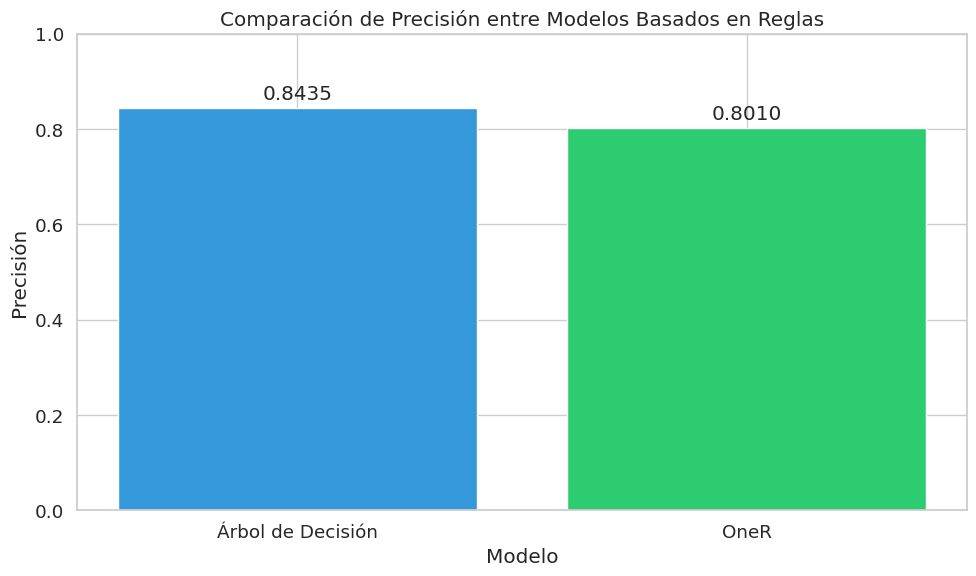


Resumen de reglas generadas por los modelos:
-------------------------------------------

1. OneR - Regla única:
SI feature_9 <= 0.50 ENTONCES Gravedad = Solo daños, SINO Gravedad = Con heridos/muertos (precisión: 0.80)

2. Árbol de Decisión - Reglas más relevantes (top 3):
Regla 1: SI MOTO <= 0.50 Y PEATON <= 0.50 Y BICICLETA > 0.50 Y MES_NUM <= 7.50 Y MES_NUM > 4.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 2: SI MOTO <= 0.50 Y PEATON > 0.50 Y AUTOMOVIL <= 1.50 Y CAMIONETA <= 0.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)
Regla 3: SI MOTO <= 0.50 Y PEATON > 0.50 Y AUTOMOVIL <= 1.50 Y CAMIONETA > 0.50 Y HORA_NUM > 8.50 ENTONCES Gravedad = Con heridos/muertos (confianza: 1.00, muestras: 1)

3. Sistema Difuso - Reglas lingüísticas:
Regla 1: SI hay moto Y es periodo nocturno, ENTONCES riesgo es alto
Regla 2: SI hay moto Y es de noche, ENTONCES riesgo es alto
Regla 3: SI hay moto Y es de madrugada, ENTONCES riesgo es alto
Re

In [ ]:
# 4. Evaluación y Comparación de Modelos
print("\n4. Evaluación y Comparación de Modelos")
print("-----------------------------------")

# Comparar las métricas de los modelos implementados
modelos = {
    'Árbol de Decisión': accuracy_dt,
    'OneR': accuracy_oner
}

# Visualizar comparación de precisión
plt.figure(figsize=(10, 6))
bars = plt.bar(list(modelos.keys()), list(modelos.values()), color=['#3498db', '#2ecc71'])
plt.title('Comparación de Precisión entre Modelos Basados en Reglas')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim(0, 1)

# Añadir etiquetas de valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Resumen de reglas generadas por los modelos
print("\nResumen de reglas generadas por los modelos:")
print("-------------------------------------------")
print("\n1. OneR - Regla única:")
print(oner_classifier.get_rule())

print("\n2. Árbol de Decisión - Reglas más relevantes (top 3):")
for i, (rule, _, _) in enumerate(rules[:3], 1):
    print(f"Regla {i}: {rule}")

print("\n3. Sistema Difuso - Reglas lingüísticas:")
print("Regla 1: SI hay moto Y es periodo nocturno, ENTONCES riesgo es alto")
print("Regla 2: SI hay moto Y es de noche, ENTONCES riesgo es alto")
print("Regla 3: SI hay moto Y es de madrugada, ENTONCES riesgo es alto")
print("Regla 4: SI no hay moto Y es periodo diurno, ENTONCES riesgo es bajo")
print("Regla 5: SI es periodo diurno Y es de mañana, ENTONCES riesgo es bajo")
print("Regla 6: SI hay moto Y es periodo diurno Y es de tarde, ENTONCES riesgo es medio")

print("\n5. Conclusiones")
print("-------------")
print("""
En este análisis, hemos implementado y evaluado diferentes sistemas basados en reglas para la clasificación
de accidentes de tránsito en Bucaramanga. Los principales hallazgos son:

1. Los accidentes que involucran motocicletas tienden a tener mayor gravedad, especialmente
   durante el periodo nocturno y en horas de la noche o madrugada.

2. El algoritmo OneR destaca la variable más discriminante (presencia de moto o no) como
   un factor determinante en la gravedad de los accidentes.

3. El árbol de decisión proporciona reglas más detalladas que combinan múltiples factores,
   alcanzando una precisión del {:.2f}%.

4. El sistema difuso permite modelar la incertidumbre y los conceptos vagos mediante reglas
   lingüísticas, facilitando la interpretación del riesgo de accidentes graves.

5. Los tres enfoques (Árbol de Decisión, OneR y Sistema Difuso) son complementarios y ofrecen
   perspectivas valiosas para la comprensión y prevención de accidentes graves.
""".format(accuracy_dt * 100))

# 5.Final